# GA Data Science- Final Project

# NLP Analysis of Yelp Review Data

## By: Israel Niezen

# Project Design Write-Up

## Project Problem and Hypothesis
-  #### The objective of this project is to use NLP analisys to explore if the words in Yelp reviews can be used to predict the rating of those respective reviews, whether positive or negative.
-  #### This is a machine learning problem because while humans can easily understand language and detect positive and negative words, for computers, this is not as natural.  I want to use machine learning algorithms for NLP that correctly classify positive and negative reviews based on text features.
-  #### This type of analysis could provide valuable impact, allowing businesses to identify positive/negative reviews for their different products, for their competitors, for different segments of clients, etc.
-  #### I believe that word features and review length will have the most impact as predictors.

## Datasets
-  #### For this project, I will be using the Yelp dataset from Kaggle.
-  #### Dataset Description:
-  Each observation in this dataset is a review of a particular business by a particular user.
-  The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
-  The "cool" column is the number of "cool" votes this review received from other Yelp users.
-  All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
-  The "useful" and "funny" columns are similar to the "cool" column.

## Domain Knowledge
-  While this is the first time I program an NLP project, I have in the past worked with NLP analysis prepared by others for sentiment analysis and to analyze reviews of my competitors' products, so I feel confident that I understand the value that this type of analysis can provide for businesses.

## Project Concerns
-  The problem assumes that certain words and themes in the reviews might predict whether ratings are positive or negative.  I have never done an NLP analysis project like this before, except in class.
-  Thankfully, the risk of my model being incorrect is low, since this is not a project related to my work.
-  Another concern is that the data was nicely cleaned up and provided by Kaggle.  In the real world, I'd have to scrape it myself or pull it via an API if it exists.  Those are skills that we haven't really learned in enough detail.

## Outcomes
-  I expect the outcome to look like scoring for classification models and charts that show useful data.
-  My target audience for this project is a business audience, and they expect logical explanations in a powerpoint presentation.
-  My model should not be too complicated, since we have done an NLP project in class and I can refer to that code for initial help.
-  To be a success, my project should produce AUC scores above .50.  If it doesn't, then I will try to learn what went wrong.


## Loading Yelp Dataset & Necessary Libraries

In [1]:
# Unicode Handling
from __future__ import unicode_literals

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 8)
import seaborn as sns

data = pd.read_csv("yelp.csv")

### Describing Yelp Dataset

In [2]:

data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


### Creating a text_length function & data column to check whether review length can serve as a predictor variable

In [3]:
data['text_length'] = data['text'].apply(len)

### Creating separate data columns returning a binary result TRUE if the Yelp review is POSITIVE or NEGATIVE
#### Positive review is defined as having 4 or 5 stars. Negative review is defined as having 1 star.

In [4]:
data['is_positive'] = ((data['stars'] ==4) | (data['stars']==5))
data['is_negative'] = (data['stars'] ==1) 

### Reading new dataframe head to make sure all new columns are included

In [5]:

data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,is_positive,is_negative
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,True,False
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,True,False
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,True,False
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,True,False
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,True,False


# Exploratory Data Analysis

#### Grouping Data By Star Rating To See If Summary Helps Us Gather Anything Useful

In [6]:
stars_grouping = data.groupby('stars').sum()
stars_grouping

,cool,useful,funny,text_length,is_positive,is_negative
stars,,,,,,
1,432,1202,791,619060,0.0,749.0
2,667,1449,812,780772,0.0,0.0
3,1152,1909,1015,1108166,0.0,0.0
4,3366,4922,2364,2513767,3526.0,0.0
5,3151,4611,2031,2085622,3337.0,0.0


### Plotting Amount of Reviews By Star Rating Suggests that Reviewers Tend To More Often Review Businesses They feel Positively About

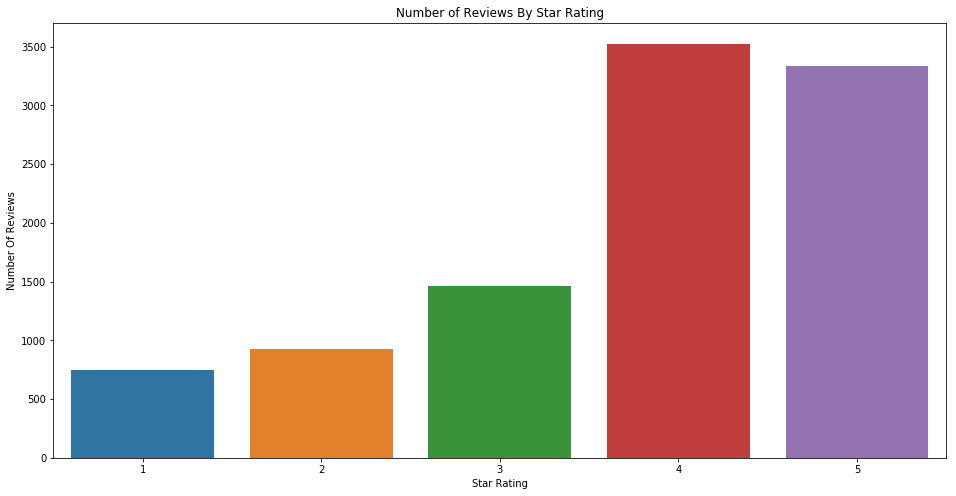

In [7]:
ax = sns.countplot(x= 'stars', data=data)
ax.set_ylabel('Number Of Reviews')
ax.set_xlabel('Star Rating')
ax.set_title('Number of Reviews By Star Rating')

### Plotting Average Text Length By Star Rating Suggests Reviewers Tend To Write Longer NEGATIVE Reviews Than POSITIVE Reviews
Used both barplot and boxplot (below) to explore min/max values and outliers

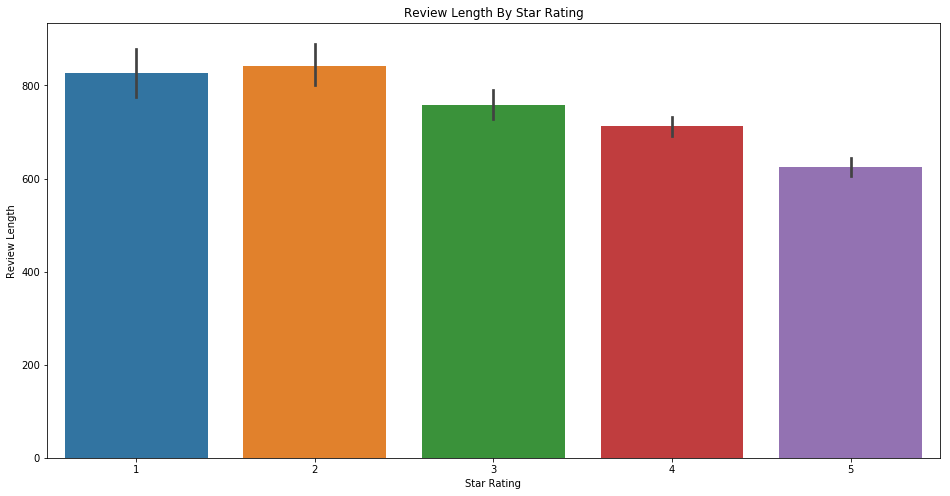

In [8]:
ax = sns.barplot(x= 'stars', y= 'text_length', data=data)
ax.set_ylabel('Review Length')
ax.set_xlabel('Star Rating')
ax.set_title('Review Length By Star Rating')

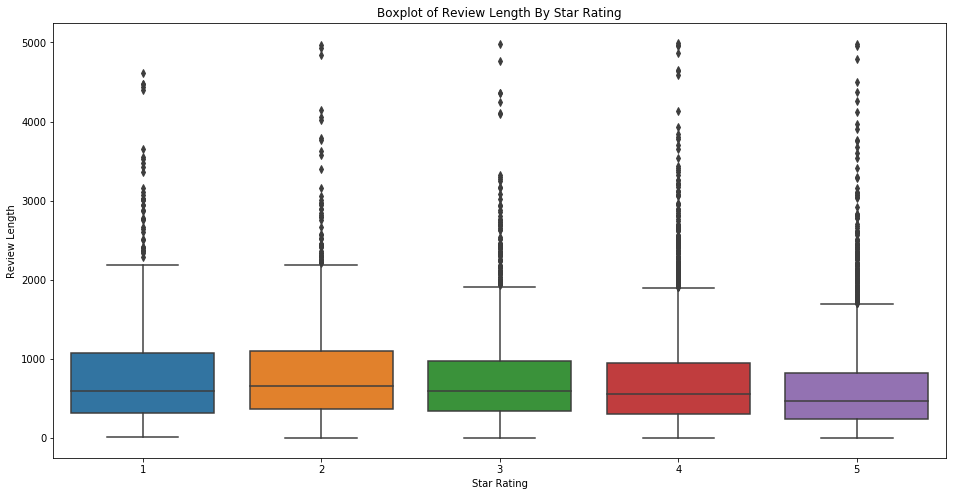

In [9]:
ax = sns.boxplot(x= 'stars', y= 'text_length', data=data)
ax.set_ylabel('Review Length')
ax.set_xlabel('Star Rating')
ax.set_title('Boxplot of Review Length By Star Rating')

### Plotting The Relationship Between Star Rating and "Cool" Votes for Reviews Suggests That Positive Reviews Receive More "Cool" Votes

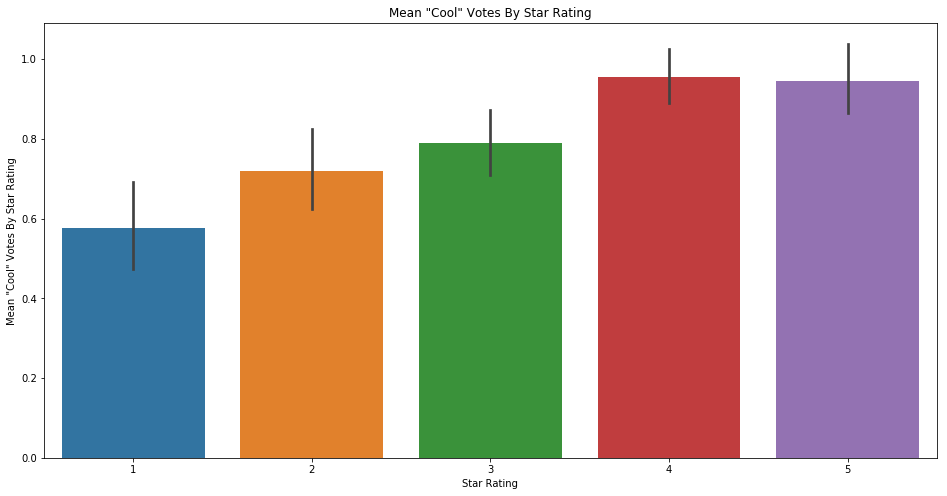

In [10]:
ax = sns.barplot(x= 'stars', y= 'cool', data=data)
ax.set_ylabel('Mean "Cool" Votes By Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean "Cool" Votes By Star Rating')

### Plotting The Relationship Between Star Rating and "Useful" Votes for Reviews Suggests That Reviewers Find NEGATIVE Reviews More Useful Than Positive Reviews.  "Middle Of The Road" Reviews (3 star rating) Get The Lowest "Useful" Votes Overall.

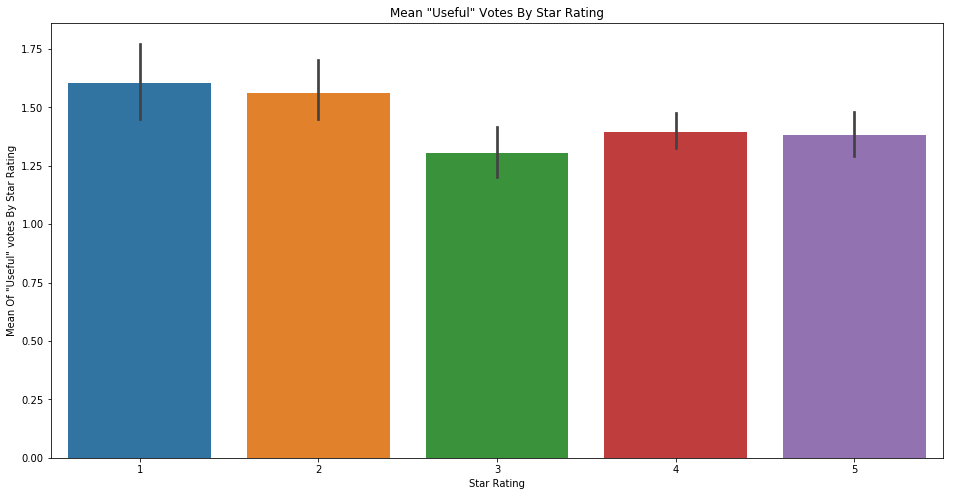

In [11]:

#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'useful', data=data)
ax.set_ylabel('Mean Of "Useful" votes By Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean "Useful" Votes By Star Rating')

### Plotting The Relationship Between Star Rating and "Funny" Votes for Reviews Suggests That Reviewers Find NEGATIVE Reviews Funnier Than Positive Reviews.  

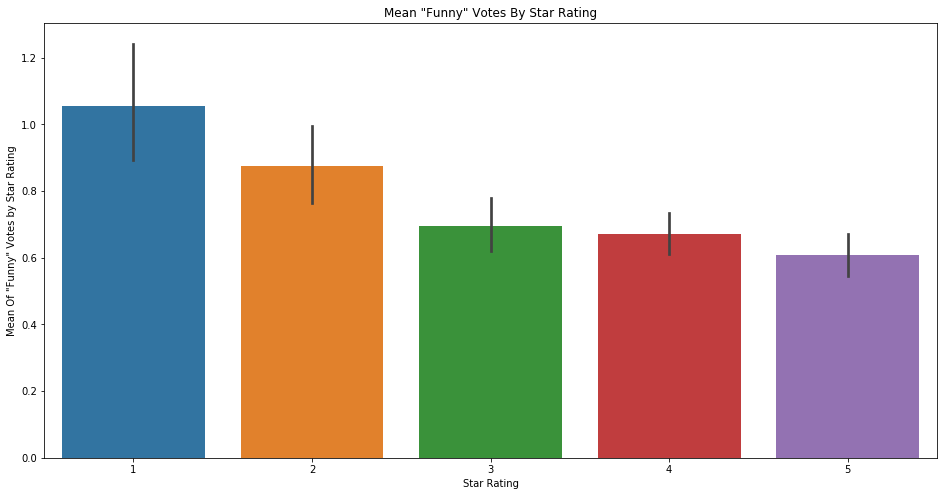

In [12]:
#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'funny', data=data)
ax.set_ylabel('Mean Of "Funny" Votes by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean "Funny" Votes By Star Rating')

# Natural Language Processing Section

### Will be using Spacy, an open-source NLP Library for Python

In [13]:
## Load spacy

from spacy.en import English
nlp_toolkit = English()
nlp_toolkit

## Investigate Review Text To See If Specific Words In Review Text Might Have A Measurable Impact On Review Ratings

 ### Extracting Text Content That Includes Word "Cool" and Creating a Function That Adds a Column For This.

In [14]:
def references_cool(text):
    parsed = nlp_toolkit(text)
    return any([str(word) == 'cool' for word in parsed])

data['references_cool'] = data['text'].map(references_cool)

# Taking a look to ensure function worked
data[data['references_cool']][['text']].head()

,text
24,I love this place! I have been coming here for...
38,"This Mexican food is very simple, slightly bla..."
41,I really really like Frances. I love most of ...
49,"After my last review, somewhat scathing regard..."
55,"In our continuing quest to identify cool, loca..."


#### This Line Of Code Pulls The Entire Review Values Containing The Word "COOL", but takes too long too process, so it's commented out

In [15]:
#data[data['references_cool']][['text']].head().values

 ### Extracting Text Content That Includes Word "Great" and Creating a Function That Adds a Column For This.
 #### Trying different syntax than above



In [16]:
# Option 1: Create a function to check for this

def has_great(text_in):
    try:
        if 'great' in str(text_in).lower():
            return 1
        else:
            return 0
    except: 
        return 0
        
data['references_great'] = data['text'].map(has_great)

#### Reviewing Dataframe to Make Sure My New Columns for Text Features Were Added

In [17]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,is_positive,is_negative,references_cool,references_great
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,True,False,False,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,True,False,False,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,True,False,False,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,True,False,False,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,True,False,False,0


### Plotting Mean Frequency of Reviews Using the Word "COOL" Suggests A Small Difference Between Star Ratings

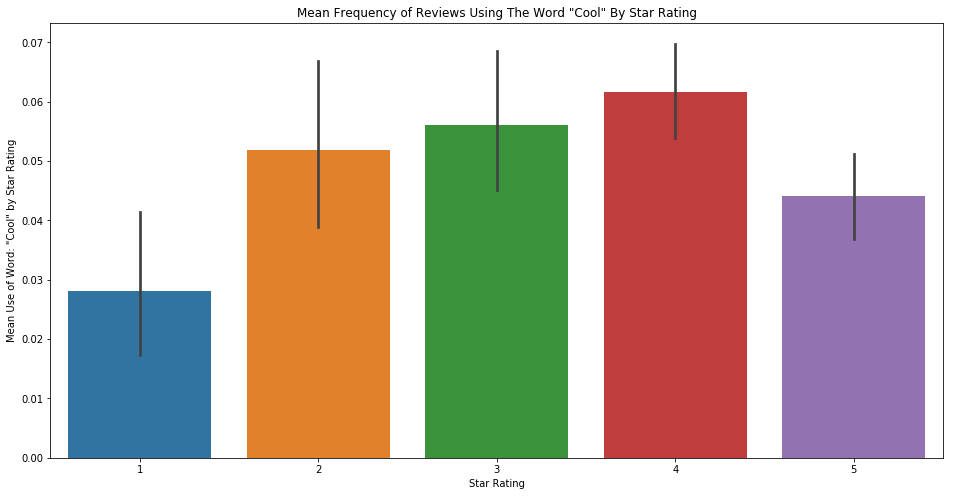

In [18]:
#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'references_cool', data=data)
ax.set_ylabel('Mean Use of Word: "Cool" by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean Frequency of Reviews Using The Word "Cool" By Star Rating')

### Plotting Mean Frequency of Reviews Using the Word "GREAT" Suggests A Significant Correlation Between Use of The Word "Great" and Positive Yelp Reviews

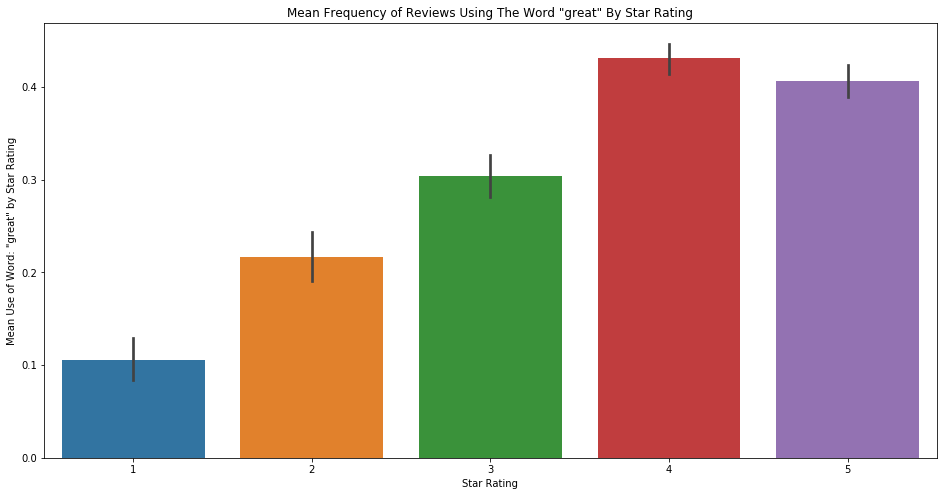

In [19]:
#stars_grouping_chart = stars_grouping.sort_values('stars', ascending=False).head(20)
ax = sns.barplot(x= 'stars', y= 'references_great', data=data)
ax.set_ylabel('Mean Use of Word: "great" by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_title('Mean Frequency of Reviews Using The Word "great" By Star Rating')

## Exploratory Data Analysis Of Review Text Suggests That Review Ratings Might Be Correlated To Specific Words As Features
### So I Decided To Use NLP To Explore This Relationship Further Using NLP Algorithms

 ### Using Count Vectorizer To Extract 1000 Features from Text

In [20]:
text = data['text'].fillna('')

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english',
                             binary=True)

# Use `fit` to learn the vocabulary of the text
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text)

In [21]:
vectorizer.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '15',
 '20',
 '25',
 '30',
 '40',
 '50',
 '99',
 'able',
 'absolutely',
 'actually',
 'add',
 'added',
 'addition',
 'admit',
 'afternoon',
 'ago',
 'agree',
 'ahead',
 'amazing',
 'ambiance',
 'american',
 'apparently',
 'appetizer',
 'appetizers',
 'appreciate',
 'area',
 'aren',
 'arizona',
 'arrived',
 'art',
 'asian',
 'ask',
 'asked',
 'asking',
 'ass',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'authentic',
 'available',
 'average',
 'avoid',
 'away',
 'awesome',
 'awful',
 'az',
 'baby',
 'bacon',
 'bad',
 'bag',
 'baked',
 'bar',
 'bars',
 'bartender',
 'bartenders',
 'based',
 'basically',
 'basil',
 'bathroom',
 'bbq',
 'bean',
 'beans',
 'beat',
 'beautiful',
 'beef',
 'beer',
 'beers',
 'believe',
 'best',
 'better',
 'big',
 'birthday',
 'bit',
 'bite',
 'black',
 'bland',
 'blue',
 'book',
 'bottle',
 'bought',
 'bowl',
 'box',
 'boyfriend',
 'bread',
 'break',
 'breakfast',
 'bring',
 'brought',
 'brown',
 'brunch',
 'bucks'

 ## Building A Random Forest Model to Predict If Yelp Review is POSITIVE Produces High AUC Scores Suggesting That Reviews Can Successfully Be Classified as Positive Based On Text Features

### Creating And Scoring The Random Forest Classifier Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
# Use `fit` to learn the vocabulary of the text reviews

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = X.toarray()
y = data['is_positive']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

/Users/israelniezen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV AUC [ 0.80254783  0.81312029  0.80929071], Average AUC 0.8083196094354342


#### Fitting The Model and Creating Dataframe With Top 20 Features Based On Importance Score (measuring their impact on classifying Positive reviews)

In [23]:
model.fit(X, y)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)

,Features,Importance Score
363,great,0.023344
585,ok,0.012788
208,delicious,0.010691
503,love,0.009567
23,amazing,0.008199
54,bad,0.008123
74,best,0.008017
412,horrible,0.007425
214,didn,0.006139
46,average,0.005690


## Barchart to Explore Most Important Positive Review Features Using Random Forest Model

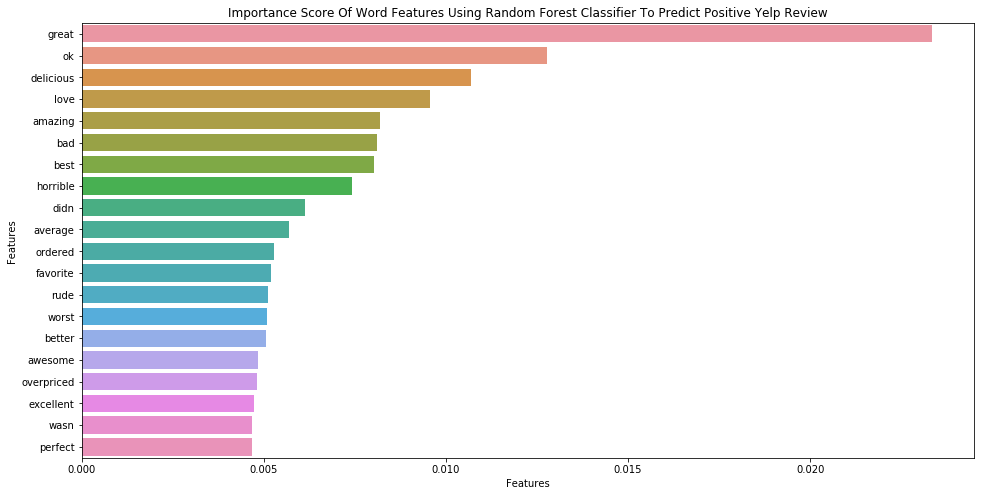

In [24]:
#posFeatures = sns.load_dataset("top_feature_importances")
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using Random Forest Classifier To Predict Positive Yelp Review')


 ## Using `Tf-IdfVectorizer` instead of `CountVectorizer`  shows a slight improvement
 
 ### Creating And Scoring The TF-IDF-Vectorizer Model

In [25]:
## 
text = data['text'].fillna('')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english')


# Use `fit` to learn the vocabulary
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text).toarray()

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.8215045   0.82179323  0.80557175], Average AUC 0.8162898246274987


#### Fitting The Model and Creating Dataframe With Top 20 Features Based On Importance Score (measuring their impact on classifying Positive reviews)

In [26]:
model.fit(X, y)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)

,Features,Importance Score
367,great,0.023390
587,ok,0.013054
505,love,0.012555
218,delicious,0.011350
55,bad,0.010276
77,best,0.008460
448,just,0.008165
319,food,0.007686
24,amazing,0.007636
961,wasn,0.007366


## Barchart to Explore Most Important Positive Review Features Using TF-IDF Vectorizer

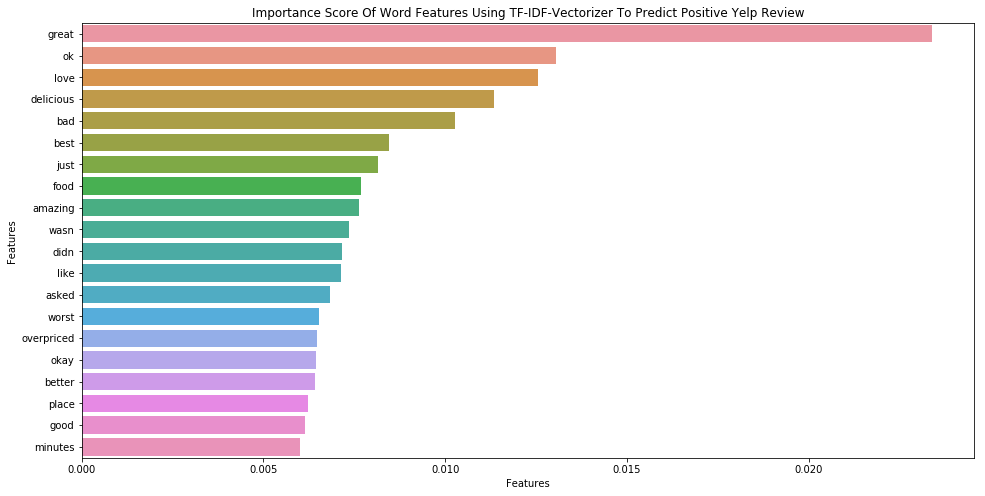

In [27]:
#posFeatures = sns.load_dataset("top_feature_importances")
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using TF-IDF-Vectorizer To Predict Positive Yelp Review')

## Applying LDA to text reviews to see if there are helpful clusters in review text body.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=False,
stop_words='english',
min_df=3)
docs = cv.fit_transform(text.dropna())
# Build a mapping of numerical ID to word
id2word = dict(enumerate(cv.get_feature_names()))

In [29]:
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus
# First we convert our word-matrix into gensim's format
corpus = Sparse2Corpus(docs, documents_columns = False)
# Then we fit an LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5)

In [30]:
num_topics = 5
num_words = 5
for ti, topic in enumerate(lda_model.show_topics(num_topics = num_topics, num_words = num_words)):
    print("Topic: %d" % (ti))
    print (topic)
    print()

Topic: 0
(0, '0.013*"like" + 0.009*"just" + 0.009*"place" + 0.008*"good" + 0.007*"don"')

Topic: 1
(1, '0.013*"place" + 0.011*"pizza" + 0.009*"like" + 0.009*"burger" + 0.008*"good"')

Topic: 2
(2, '0.020*"food" + 0.018*"good" + 0.014*"place" + 0.011*"great" + 0.008*"like"')

Topic: 3
(3, '0.010*"place" + 0.010*"great" + 0.008*"good" + 0.007*"time" + 0.007*"like"')

Topic: 4
(4, '0.010*"place" + 0.010*"great" + 0.008*"just" + 0.008*"good" + 0.006*"salad"')



## Building a random forest model to predict whether review is positive using text features AND review length.  
### Higher Score Suggests That Text Length Has A Strong Predictor Impact As Well.  In Fact, Review Length Becomes One of The Most Important Features

In [36]:

X2 = vectorizer.transform(text).toarray()

In [37]:
## TODO

X2_additional_cols = ['text_length']
X2_additional_data = data[X2_additional_cols]

from scipy.sparse import hstack
X2 = hstack((X2, X2_additional_data)).toarray()
y2 = data['is_positive']

from sklearn.cross_validation import cross_val_score

model_pos_len = RandomForestClassifier(n_estimators = 20)
scores_pos_len = cross_val_score(model_pos_len, X2, y2, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores_pos_len, scores_pos_len.mean()))


CV AUC [ 0.80925023  0.81400423  0.81677047], Average AUC 0.8133416450474508


In [38]:


# all_feature_names = vectorizer.get_feature_names()
# pos_len_feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model_pos_len.feature_importances_})
# print(pos_len_feature_importances)
# pos_len_feature_importances.sort_values('Importance Score', ascending=False).head(20)

model_pos_len.fit(X2, y2)

all_feature_names = vectorizer.get_feature_names()
#print(all_feature_names)
feature_importances = pd.DataFrame({'Features' : all_feature_names + ['review_length'], 'Importance Score': model_pos_len.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)


,Features,Importance Score
367,great,0.025644
1000,review_length,0.013926
587,ok,0.013825
218,delicious,0.011573
505,love,0.011320
55,bad,0.010201
77,best,0.009131
78,better,0.008248
24,amazing,0.007800
319,food,0.007775


## Barchart to Explore Most Important Positive Review Features Using Random Forest AND Review Length

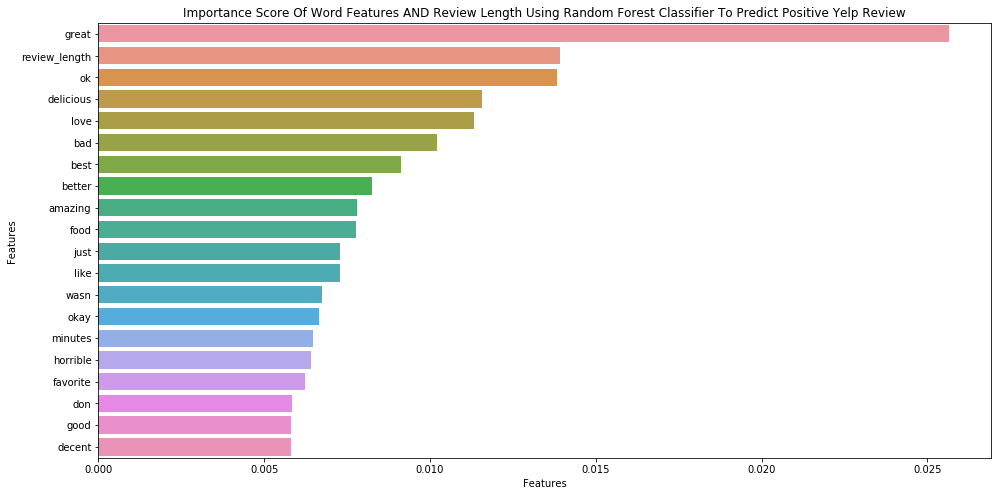

In [39]:
#posFeatures = sns.load_dataset("top_feature_importances")
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features AND Review Length Using Random Forest Classifier To Predict Positive Yelp Review')

 ### Building a random forest model to predict whether review is NEGATIVE using the review's "text" features

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_neg = RandomForestClassifier(n_estimators = 20)
    
# Use `fit` to learn the vocabulary of the text reviews

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X3 = X
y3 = data['is_negative']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model_neg, X3, y3, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.80890208  0.83155966  0.81238675], Average AUC 0.817616163009585


In [41]:
model_neg.fit(X3, y3)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model_neg.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)


,Features,Importance Score
414,horrible,0.026004
727,rude,0.016115
985,worst,0.015773
892,told,0.012515
367,great,0.012093
548,minutes,0.012092
51,awful,0.011839
522,manager,0.008857
319,food,0.008811
554,money,0.008746


## Barchart to Explore Most Important Negative Review Features Using Random Forest

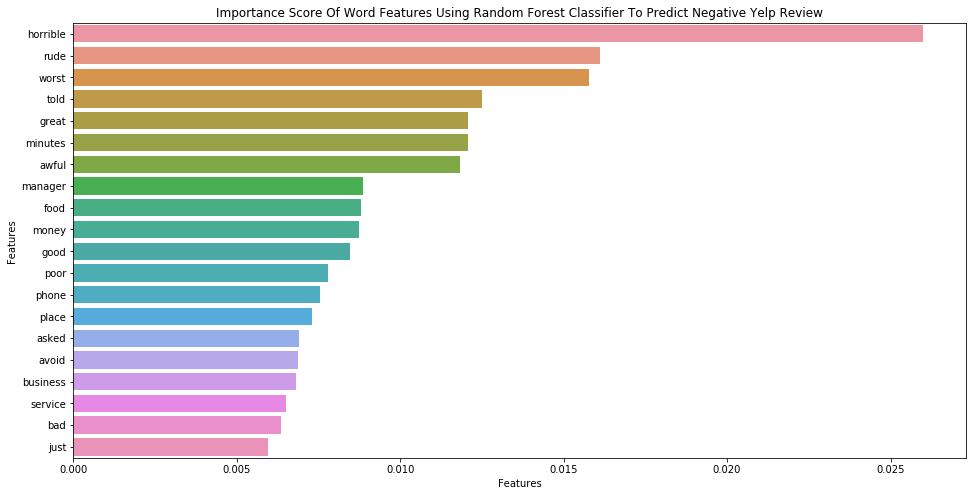

In [42]:
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using Random Forest Classifier To Predict Negative Yelp Review')

 ### Using `Tf-IdfVectorizer` instead of `CountVectorizer`  shows a slight improvement

In [43]:
## 
titles = data['text'].fillna('')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english')


# Use `fit` to learn the vocabulary
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text).toarray()

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.81040348  0.81934676  0.8162738 ], Average AUC 0.8153413465127971


In [44]:
model_neg.fit(X3, y3)

all_feature_names = vectorizer.get_feature_names()
feature_importances = pd.DataFrame({'Features' : all_feature_names, 'Importance Score': model_neg.feature_importances_})
feature_importances.sort_values('Importance Score', ascending=False).head(20)

,Features,Importance Score
414,horrible,0.023473
727,rude,0.016074
985,worst,0.015887
892,told,0.011716
548,minutes,0.011443
367,great,0.010402
554,money,0.009620
51,awful,0.009108
641,phone,0.008692
664,poor,0.008662


## Barchart to Explore Most Important Negative Review Features Using TF-IDF Vectorizer

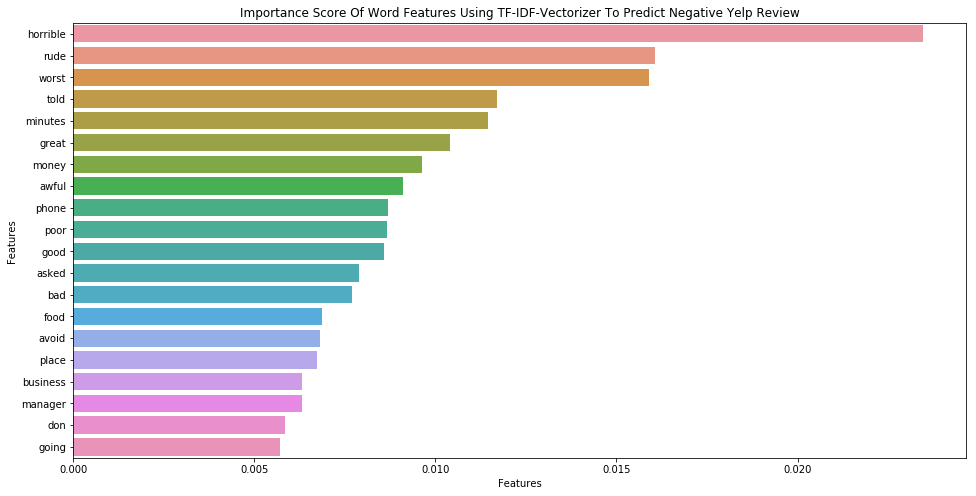

In [45]:
top_feature_importances = feature_importances.sort_values('Importance Score', ascending=False).head(20)
ax = sns.barplot(y='Features', x='Importance Score', data=top_feature_importances)
ax.set_xlabel('Features')
ax.set_title('Importance Score Of Word Features Using TF-IDF-Vectorizer To Predict Negative Yelp Review')